<a href="https://colab.research.google.com/github/etuckerman/HuggingFaceCo-NLP/blob/main/HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
import transformers

In [3]:
!pip install transformers[sentencepiece]

# ***Transformers, what can they do?![en_chapter1_transformers_chrono-dark.svg](![en_chapter1_transformers_chrono-dark (1).png](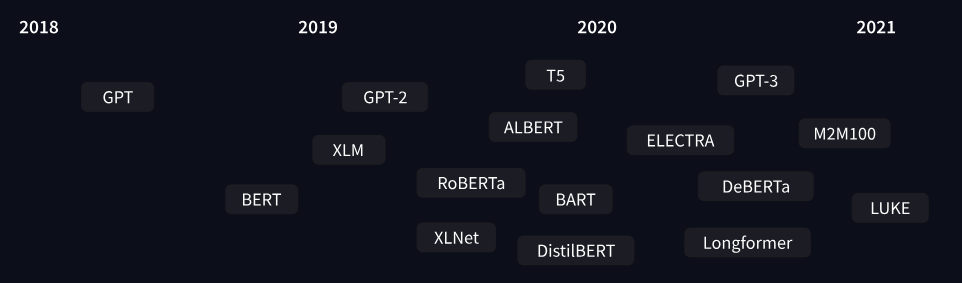))***

## **Pipeline**

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

In [19]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.


Some of the currently available pipelines are:
1. fill-mask
2. ner (named entity recognition)
3. question-answering
4. sentiment-analysis
5. summarization
6. text-generation
7. translation
8. zero-shot-classification

### **Zero-shot classification**

 the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model. It can also classify the text using any other set of labels you like.

In [13]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445989489555359, 0.11197412759065628, 0.04342695698142052]}

## **Text generation**

How to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results.

In [14]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to build powerful new tools and technologies called Node.js. Here is an example of creating a new Node.js app using Ruby on Rails.\n\nStep 1\n\nCreate an instance of Node.'}]

You can control how many different sequences are generated with the argument num_return_sequences and the total length of the output text with the argument max_length.

## **Using any model from the Hub in a pipeline**

The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the [Model Hub](https://huggingface.co/models) and click on the corresponding tag on the left to display only the supported models for that task. You should get to a page like [this one](https://huggingface.co/models?pipeline_tag=text-generation).

Let’s try the [distilgpt2](https://huggingface.co/distilgpt2) model! Here’s how to load it in the same pipeline as before:

In [16]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to start a new hobby, but please subscribe and let us know what you think!'},
 {'generated_text': 'In this course, we will teach you how to apply your skills to the environment, from the environment to the environment—we teach you how to apply'}]

## **Mask filling**

The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:



In [20]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.19619806110858917,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.04052723944187164,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

The top_k argument controls how many possibilities you want to be displayed. Note that here the model fills in the special <mask> word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

## **Named entity recognition**

Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [21]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:168: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

Here the model correctly identified that Sylvain is a person (PER), Hugging Face an organization (ORG), and Brooklyn a location (LOC).

We pass the option grouped_entities=True in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

## **Question answering**

In [22]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6949767470359802, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.



## **Summarization**

Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [23]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Like with text generation, you can specify a max_length or a min_length for the result.



## **Translation**

For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [24]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]

Like with text generation and summarization, you can specify a max_length or a min_length for the result.



The pipelines shown so far are mostly for demonstrative purposes. They were programmed for specific tasks and cannot perform variations of them. In the next chapter, you’ll learn what’s inside a pipeline() function and how to customize its behavior.

# ***How do Transformers work?***

In this section, we will take a high-level look at the architecture of Transformer models.

## **A bit of Transformer history**

[Here](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/transformers_chrono-dark.svg) are some reference points in the (short) history of Transformer models:



The Transformer architecture was introduced in June 2017. The focus of the original research was on translation tasks. This was followed by the introduction of several influential models, including:

1. June 2018: GPT, the first pretrained Transformer model, used for fine-tuning on various NLP tasks and obtained state-of-the-art results

2. October 2018: BERT, another large pretrained model, this one designed to produce better summaries of sentences (more on this in the next chapter!)

3. February 2019: GPT-2, an improved (and bigger) version of GPT that was not immediately publicly released due to ethical concerns

4. October 2019: DistilBERT, a distilled version of BERT that is 60% faster, 40% lighter in memory, and still retains 97% of BERT’s performance

5. October 2019: BART and T5, two large pretrained models using the same architecture as the original Transformer model (the first to do so)

6. May 2020, GPT-3, an even bigger version of GPT-2 that is able to perform well on a variety of tasks without the need for fine-tuning (called zero-shot learning)

This list is far from comprehensive, and is just meant to highlight a few of the different kinds of Transformer models. Broadly, they can be grouped into three categories:

1. **GPT-like (also called auto-regressive Transformer models)**
2. **BERT-like (also called auto-encoding Transformer models)**
3. **BART/T5-like (also called sequence-to-sequence Transformer models)**

## **Transformers are language models**

All the Transformer models mentioned above (GPT, BERT, BART, T5, etc.) have been trained as language models. This means they have been trained on large amounts of raw text in a self-supervised fashion. Self-supervised learning is a type of training in which the objective is automatically computed from the inputs of the model. That means that humans are not needed to label the data!

This type of model develops a statistical understanding of the language it has been trained on, but it’s not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called transfer learning. During this process, the model is fine-tuned in a supervised way — that is, using human-annotated labels — on a given task.

An [example](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/causal_modeling-dark.svg) of a task is predicting the next word in a sentence having read the n previous words.

This is called **causal language modeling** because the output depends on the past and present inputs, but not the future ones.

Another [example](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/masked_modeling-dark.svg) is **masked language modeling**, in which the model predicts a masked word in the sentence.



## **Transformers are big models**

Apart from a few outliers (like DistilBERT), the [general strategy](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/model_parameters.png) to achieve better performance is by increasing the models’ sizes as well as the amount of data they are pretrained on.

Unfortunately, training a model, especially a large one, requires a large amount of data. This becomes very costly in terms of time and compute resources. It even translates to environmental impact, as can be seen in the [following graph](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/carbon_footprint-dark.svg).


## **Transfer Learning**

[Pretraining](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/pretraining-dark.svg) is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.



This pretraining is usually done on very large amounts of data. Therefore, it requires a very large corpus of data, and training can take up to several weeks.

Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train the model for your final use case from the start (scratch)? There are a couple of reasons:

1. The pretrained model was already trained on a dataset that has some similarities with the fine-tuning dataset. The fine-tuning process is thus able to take advantage of knowledge acquired by the initial model during pretraining (for instance, with NLP problems, the pretrained model will have some kind of statistical understanding of the language you are using for your task).
2. Since the pretrained model was already trained on lots of data, the fine-tuning requires way less data to get decent results.
3. For the same reason, the amount of time and resources needed to get good results are much lower.

For example, one could leverage a pretrained model trained on the English language and then fine-tune it on an arXiv corpus, resulting in a science/research-based model. The fine-tuning will only require a limited amount of data: the knowledge the pretrained model has acquired is “transferred,” hence the term transfer learning.

[Fine-tuning](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter1/finetuning-dark.svg) a model therefore has lower time, data, financial, and environmental costs. It is also quicker and easier to iterate over different fine-tuning schemes, as the training is less constraining than a full pretraining.

This process will also achieve better results than training from scratch (unless you have lots of data), which is why you should always try to leverage a pretrained model — one as close as possible to the task you have at hand — and fine-tune it.